In [46]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

In [47]:
# Set a seed for reproducibility
np.random.seed(1)

# Generate 1000 samples for input features uniformly distributed between -2*pi and 2*pi
# input_features = np.random.uniform(-2*np.pi, 2*np.pi, 1000)
input_features = np.random.uniform(-2*np.pi, 2*np.pi, 5000)

# The target variable is the cosine of the input features
target_variable = np.cos(input_features)

In [48]:
# Add Gaussian noise to the input features and target variable
# noise_level = 0.1
noise_level = 0.5
input_features_noisy = input_features + np.random.normal(0, noise_level, size=input_features.shape)
target_variable_noisy = target_variable + np.random.normal(0, noise_level, size=target_variable.shape)

In [49]:
# Define the Multi-Layer Perceptron (MLP) model
# mlp_model = Sequential()
# mlp_model.add(Dense(16, input_dim=1, activation='relu'))  # First hidden layer with 16 neurons
# mlp_model.add(Dropout(0.2))  # Dropout layer for regularization
# mlp_model.add(Dense(8, activation='relu'))  # Second hidden layer with 8 neurons
# mlp_model.add(Dense(1))  # Output layer
# Define different layers
mlp_model = Sequential()
mlp_model.add(Dense(32, input_dim=1, activation='relu'))  # First hidden layer with 16 neurons
mlp_model.add(Dropout(0.2))  # Dropout layer for regularization
mlp_model.add(Dense(8, activation='relu'))  # Second hidden layer with 8 neurons
mlp_model.add(Dense(1))  # Output layer

In [50]:
# Compile the model with mean squared error loss and Adam optimizer
mlp_model.compile(loss='mean_squared_error', optimizer='adam')

In [51]:
# Train the model for 200 epochs with a batch size of 32
# training_history = mlp_model.fit(input_features, target_variable, epochs=200, batch_size=32, verbose=0)
training_history = mlp_model.fit(input_features, target_variable, epochs=300, batch_size=16, verbose=0)

In [52]:
# Generate 100 test data points uniformly distributed between -2*pi and 2*pi
# test_input = np.linspace(-2*np.pi, 2*np.pi, 100)
test_input = np.linspace(-2*np.pi, 2*np.pi, 200)
test_target = np.cos(test_input)

In [53]:
# Use the trained model to make predictions on the test data
test_predictions = mlp_model.predict(test_input)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


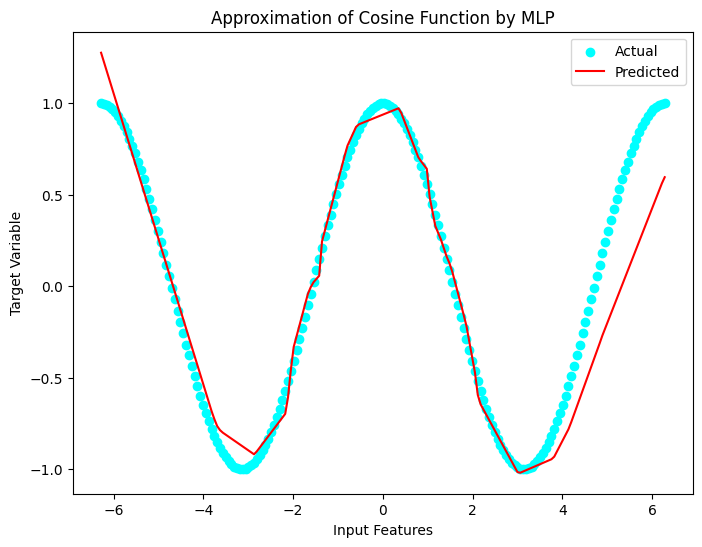

In [54]:
# Plot the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(test_input, test_target, color='cyan', label='Actual')
plt.plot(test_input, test_predictions, color='red', label='Predicted')
plt.xlabel('Input Features')
plt.ylabel('Target Variable')
plt.title('Approximation of Cosine Function by MLP')
plt.legend()
plt.show()